In [2]:
import scipy.stats as st
import statistics as s
import numpy as np
import matplotlib.pyplot as plt

In [5]:
height=[169,174,156,155,158,195,158, 163,175,172,182,176]

In [7]:
len(height)

12

In [8]:
#Sample mean
sample_mean=np.mean(height)
sample_mean

169.41666666666666

In [35]:
# Calculating Z value
z_value=st.norm.ppf(0.99)
z_value

2.3263478740408408

In [27]:
np.std(height)

11.564733267808453

In [28]:
## Calculating standard error of mean
sem=st.sem(height)
sem

3.4868982772601207

In [29]:
## Calculating Confidence interval
lower_range=sample_mean-(z_value*sem)
upper_range=sample_mean+(z_value*sem)

In [30]:
print(lower_range,upper_range)

164.9480267205492 173.88530661278412


<Figure size 720x360 with 0 Axes>

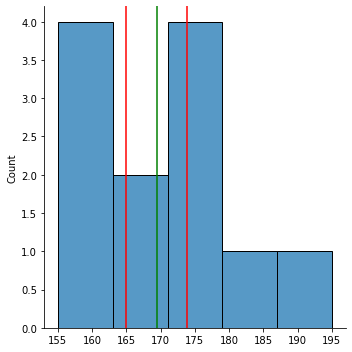

In [31]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.displot(height)
plt.axvline(x=lower_range,color="red")
plt.axvline(x=upper_range,color="red")
plt.axvline(x=sample_mean,color="green")
plt.show()

<Figure size 720x360 with 0 Axes>

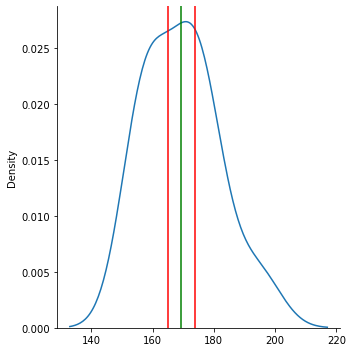

In [34]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.displot(height,kind="kde")
plt.axvline(x=lower_range,color="red")
plt.axvline(x=upper_range,color="red")
plt.axvline(x=sample_mean,color="green")
plt.show()

# One Sample T test

In [9]:
from scipy.stats import ttest_1samp
from random import sample
import numpy as np

 Problem statement: Test hypothesis whether average weightt of new born is 3 kg
 
 Null Hypothesis: avg wieght of newborn is equal to 3 kg, mu=3kg
 
 Alternernate hypothesis: avg weight of newborn is not equal to 3kg, mu!=3kg

In [16]:
weights=[2,1,5,1,2,3,3.5,5,4,2,2.5,3,3.5,5,2.5,3,4,2,5,2.2,3.5,3,4,5]
#weights=[2,1,5,3,3,3,3.5,5,4,3,2.5,3,3.5,5,3.5,3,4,2,5,3.2,3.5,3,4,5]

In [17]:
len(weights)

avg_weight=np.mean(weights)
avg_weight

3.4458333333333333

In [22]:
print(ttest_1samp(weights,popmean=3))

Ttest_1sampResult(statistic=2.073505946629001, pvalue=0.049508385262653526)


p value ranges between 0-1
if p value is lesss than 0.05, (alpha=1-level of confidence), reject the null hypothesis
if p value is >= than 0.05 , fail to reject null hypothesis


# Two sample t test

In [23]:
from scipy.stats import ttest_ind
from random import sample
import numpy as np

Problem statement: compare the average salary of male and female employees and find out whether both groups have same salries or different

Null hypotheses: Both male and female employees have same average salries, Mu_male=Mu_female

Alternate Hypothesis: male and female employees have different average salries, Mu_male!=Mu_female

In [36]:
male_salries=sample(range(40,70),30)
female_salries=sample(range(20,50),30)

In [37]:
print(ttest_ind(male_salries,female_salries,equal_var=True))

Ttest_indResult(statistic=8.798826901281197, pvalue=2.8521447136120594e-12)


In [39]:
print(np.mean(male_salries))
print(np.mean(female_salries))


#Since p values is less than 0.05, at 95% confidence level, we will reject the null hypothesis

54.5
34.5


# Paired T test

In [40]:
from scipy.stats import ttest_rel
from random import sample

Problem statement: Find out whther average weight of people before lockdown is same/different after lockdown
    
Null Hypothese:  Weights before and after lockdown are same
    
Alternate Hypothesis:Weights before and after lockdown are different

In [41]:
before_weight=sample(range(55,85),30)
after_weight=sample(range(65,95),30)


In [42]:
print(ttest_rel(before_weight,after_weight))

Ttest_relResult(statistic=-5.314767468737767, pvalue=1.0576966246252347e-05)


Since the p value is less than 0.05, at 95% confidence level, we reject the null hypothese, i.e. Weight of people before and after lockdown is different

# Z test

In [43]:
#Z test is very similar to t test except sample zie is greater than 30

# One sample Z test

Problem statement: Based on some historical data, average literacy rate in pertical country was 89%, test this hypotheis with appropriate technique for recent times

Null hypothesis: avg literacy=89%
Alternate hypothesis= avg literacy!=89%


In [44]:
from statsmodels.stats.weightstats import ztest
from random import sample

In [49]:
sample1=sample(range(25,100),50)
print(np.mean(sample1))

62.74


In [50]:
print(ztest(sample1,value=89))

(-8.622994672012204, 6.5225491461229454e-18)


since p value is less than 0.05, We reject the null hypothesis ast 95% confidence level

# Two sample Z test

In [ ]:
from statsmodels.stats.weightstats import ztest
from random import sample

problem statement: compare the average literacy rate of urban and rural regions in India and check if it is same or different

Null: average literacy of rural and urban is same

Alternate: average literacy rate is different



In [51]:
urban_literacy=sample(range(50,100),50)
rural_literacy=sample(range(30,90),50)

In [52]:
ztest(urban_literacy,rural_literacy)

(4.985294362980724, 6.18675486963188e-07)

In [53]:
print(np.mean(urban_literacy))
print(np.mean(rural_literacy))

74.5
58.94


# F test

In [1]:
import scipy.stats as s
from random import sample
import numpy as np


Problem satement: Compare the variance of male and female salries to check whtether salries is both groups have same or different distribution

Null Hypotheses: Both male and female have equal variances
Alternate hypothesis: Male and female variances are different

In [2]:
male_salary=sample(range(10,100),35)
female_salary=sample(range(45,80),35)

In [3]:
print(np.mean(male_salary))
print(np.mean(female_salary))

56.42857142857143
62.0


In [4]:
f=np.var(male_salary)/np.var(female_salary)

In [5]:
# Value of f statistics
print(f)

5.874669867947178


In [6]:
p_val=1-s.f.cdf(f,len(male_salary)-1,len(female_salary)-1)


In [7]:
print(f,p_val)

5.874669867947178 6.474680245283082e-07


Since p values in less than 0.05, at 95% confidence we will reject the null hypothesis, the variances of male and female salries are different

In [8]:
print(np.var(male_salary))
print(np.var(female_salary))

599.2163265306122
102.0


# ANOVA-- Analysis of Variance

One Way ANOVA

In [12]:
from random import sample
from scipy.stats import f_oneway

Null Hypothese: all the groups have same variances
Alternate Hypothesis: atleast one group has different variance

In [13]:
India=sample(range(10,200),40)
USA=sample(range(100,1000),40)
China=sample(range(10,300),40)

In [16]:
print(f_oneway(India,USA,China))

F_onewayResult(statistic=77.84455837422293, pvalue=3.1791154977442935e-22)


Since, p values is less than 0.05, we will reject the null hypotheses

In [17]:
print(np.var(India))
print(np.var(USA))
print(np.var(China))

2754.29
73821.7975
7711.699374999999


Two way ANOVA

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

 Null Hypothesis: No variables have any effect on marks
 Alternate hypothesis: atleast one varible has effect marks
     

In [20]:
data=pd.read_csv("sample_data_for_anova.csv")

In [21]:
data

,Gender,Tuition,Frequency,Marks
0,Male,Y,Daily,40
1,Female,Y,Weekly,40
2,TG,Y,Daily,45
3,Male,N,Daily,60
4,Female,N,Weekly,68
5,TG,Y,Daily,39
6,Male,N,Weekly,45
7,Male,Y,Daily,40
8,Female,Y,Daily,40
9,TG,Y,Weekly,45


In [22]:
model=ols('Marks~C(Gender)+C(Tuition)+C(Frequency)',data=data).fit()

In [23]:
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(Gender),342.976176,2.0,2.011448,0.168310
C(Tuition),275.229824,1.0,3.228273,0.092539
C(Frequency),111.096736,1.0,1.303095,0.271545
Residual,1278.840764,15.0,NaN,NaN


# Chi Square test of independence

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

In [24]:
data=pd.read_csv("sample_data_for_chisquare.csv")

In [25]:
data

,Gender,Color
0,Male,Red
1,Female,Blue
2,TG,Red
3,Male,Green
4,Female,Red
5,TG,Blue
6,Male,Red
7,Male,Green
8,Female,Red
9,TG,Blue


In [26]:
contingency_table=pd.crosstab(data["Gender"],data["Color"])

In [27]:
contingency_table

Color,Blue,Green,Red
Gender,,,
Female,2,1,3
Male,1,3,4
TG,2,1,3


In [29]:
chi2_contingency(contingency_table)

(1.6666666666666665,
 0.7967633822629767,
 4,
 array([[1.5, 1.5, 3. ],
        [2. , 2. , 4. ],
        [1.5, 1.5, 3. ]]))

Since p value is greater than 0.05, we can say there is no relation between color and gender
 
or

We do not have enough evidence to prove there is relation benween gender an color